# Lecture

In [3]:
import tensorflow as tf
import tensorflow_probability as tfp

tfd = tfp.distributions

Univariate distribution object:

In [5]:
normal = tfd.Normal(loc=0., scale = 1.)

normal

<tfp.distributions.Normal 'Normal' batch_shape=[] event_shape=[] dtype=float32>

- Normal class
- event_shape - dimensionality of the random variable
- batch_shape...

**Sample method**

We obtain a single sample by:

In [6]:
normal.sample()

<tf.Tensor: shape=(), dtype=float32, numpy=0.2125609>

It is a tensor object (scalar shape)

In [7]:
normal.sample(3)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 0.5169332,  0.9761687, -0.3548118], dtype=float32)>

**Prob Method**

Evaluates the probability density function (PDF) at the given input.

In [8]:
normal.prob(0.5)

<tf.Tensor: shape=(), dtype=float32, numpy=0.35206532>

**log_prob Method**

More often used... Computes the log probability at the given input.

In [9]:
normal.log_prob(0.5)

<tf.Tensor: shape=(), dtype=float32, numpy=-1.0439385>

**A discrete univariate distribution object**

In [12]:
bernoulli = tfd.Bernoulli(probs = 0.7) # Only one param: probability for the variable to take value 1.

bernoulli

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[] event_shape=[] dtype=int32>

We can also use `logits` argument.

In [22]:
bernoulli = tfd.Bernoulli(logits = 0.847)   # logits value that gives approximately 0.7 prob

bernoulli

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[] event_shape=[] dtype=int32>

In [23]:
bernoulli.sample(3)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 1, 0], dtype=int32)>

In [26]:
bernoulli.prob(1)  # aprox 0.7

<tf.Tensor: shape=(), dtype=float32, numpy=0.69993746>

In [28]:
bernoulli.log_prob(1)  # aprox log(0.7)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.35676432>

#### Increasing batch_shape

Creating a Bernoulli Object but for two independent random variables.

In [31]:
batched_bernoulli = tfd.Bernoulli(probs = [0.4, 0.5])  # Bernoulli is univariate, therefore
                                                       # this represents TWO different distributions
batched_bernoulli

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[2] event_shape=[] dtype=int32>

In [32]:
batched_bernoulli.batch_shape

TensorShape([2])

Sampling three independent samples from both of the distributions in the object.

In [34]:
batched_bernoulli.sample(3)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[0, 0],
       [1, 1],
       [0, 1]], dtype=int32)>

Probability by each distribution to be 1.

In [35]:
batched_bernoulli.prob([1, 1])

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.4, 0.5], dtype=float32)>

Log probability

In [36]:
batched_bernoulli.log_prob([1, 1])

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-0.9162907, -0.6931472], dtype=float32)>

# Coding tutorial

In [37]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

print("TF version:", tf.__version__)
print("TFP version:", tfp.__version__)

TF version: 2.7.0
TFP version: 0.14.1


In [38]:
# Additional imports and setting fixed random seed to have reproducibility

import matplotlib.pyplot as plt
import numpy as np
tf.random.set_seed(123)

### Univariate distributions

In [42]:
# Create a normal distribution from Tensorflow Distributions
normal = tfd.Normal(loc = 0, scale = 1)   # mean, stdev

normal  # scalar distribution, empty batch and event shapes

<tfp.distributions.Normal 'Normal' batch_shape=[] event_shape=[] dtype=float32>

In [43]:
# Sample from the chosen distribution...
normal.sample(1)

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.8980837], dtype=float32)>

In [44]:
# ... or sample multiple times

normal.sample(10)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 0.33875433,  0.3449861 , -0.6605785 , -0.2854994 ,  0.43852386,
        0.8288566 , -0.53591555, -0.5353483 , -1.0324248 , -2.942705  ],
      dtype=float32)>

In [58]:
# Obtain value of probability's density

normal.prob(0)

<tf.Tensor: shape=(), dtype=float32, numpy=0.3989423>

In [59]:
# Obtain value of logprobability

normal.log_prob(0)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.9189385>

In [60]:
# Verify that this really is the log of the probability

np.log(normal.prob(0))

-0.9189385

In [61]:
y = normal.sample(10000)

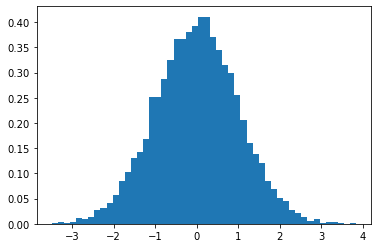

In [62]:
plt.hist(y.numpy(), bins=50, density=True)
plt.show()

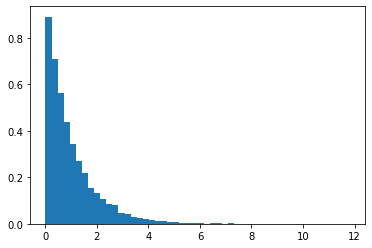

In [63]:
# Do the same for the exponential distribution

exponential = tfd.Exponential(rate = 1)
plt.hist(exponential.sample(10000).numpy(), bins = 50, density = True)
plt.show();

In [64]:
# Sample as before
exponential.sample(10)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.31796157, 0.9595855 , 0.6190708 , 1.3738598 , 1.6796894 ,
       0.40142855, 1.6830153 , 1.78942   , 0.38126466, 0.55283946],
      dtype=float32)>

In [65]:
# Create a Bernoulli distribution (discrete)

bernoulli = tfd.Bernoulli(probs = 0.8)
bernoulli.sample(20)

<tf.Tensor: shape=(20,), dtype=int32, numpy=
array([0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1],
      dtype=int32)>

**A word of caution on discrete distributions**

In [66]:
# Calculate Bernoulli prob and see that 0.5 and -1 do not give the correct probability!

for k in [0,0.5,1,-1]:   # wrong input values...
    print('prob result {} for k = {} '.format(bernoulli.prob(k), k))

prob result 0.19999998807907104 for k = 0 
prob result 0.3999999761581421 for k = 0.5 
prob result 0.800000011920929 for k = 1 
prob result 0.04999999701976776 for k = -1 


In [67]:
# Replicate the scores to see what is occurring under the hood

def my_bernoulli(p_success, k):
    return np.power(p_success,k)*np.power((1-p_success),(1-k))

In [68]:
# Evaluate it as before

for k in [0,0.5,1,-1]:
    print('prob result {} for k = {} '.format(my_bernoulli(0.8, k), k))

prob result 0.19999999999999996 for k = 0 
prob result 0.3999999999999999 for k = 0.5 
prob result 0.8 for k = 1 
prob result 0.049999999999999975 for k = -1 


### Work with batch distributions

In [69]:
# Create a batched Bernoulli distribution

bernoulli_batch = tfd.Bernoulli(probs=[0.1, 0.25, 0.5, 0.75, 0.9])
bernoulli_batch

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[5] event_shape=[] dtype=int32>

In [70]:
# Sample from it, noting the shape

bernoulli_batch.sample(5)

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[0, 0, 0, 1, 1],
       [0, 1, 0, 1, 1],
       [0, 0, 1, 1, 1],
       [0, 0, 0, 1, 1],
       [0, 0, 0, 1, 1]], dtype=int32)>

In [81]:
# Use a batch shape with higher rank

probs = [[[0.5, 0.5], 
          [0.8, 0.3], 
          [0.25, 0.75]]]
bernoulli_batch_2D = tfd.Bernoulli(probs=probs)
bernoulli_batch_2D

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[1, 3, 2] event_shape=[] dtype=int32>

In [82]:
# Sample from this batch of distributions

bernoulli_batch_2D.sample(5)

<tf.Tensor: shape=(5, 1, 3, 2), dtype=int32, numpy=
array([[[[1, 0],
         [1, 0],
         [0, 0]]],


       [[[0, 0],
         [1, 1],
         [0, 1]]],


       [[[0, 1],
         [1, 0],
         [0, 1]]],


       [[[1, 0],
         [1, 1],
         [0, 1]]],


       [[[0, 1],
         [1, 0],
         [0, 1]]]], dtype=int32)>

In [84]:
# Determine probabilities from this batch distribution

bernoulli_batch_2D.prob([[[1, 0], 
                         [0, 0], 
                         [1, 1]]])

<tf.Tensor: shape=(1, 3, 2), dtype=float32, numpy=
array([[[0.5       , 0.5       ],
        [0.19999999, 0.7       ],
        [0.25      , 0.75      ]]], dtype=float32)>